# Multi-dimensional numpy arrays

You have now learned how to read and analyze 1-dimensional data with numpy (and with pandas as an additional "layer" of tools on top of the core numpy arrays).

For the final two weeks of the semester, you will learn to manipulate multi-dimensional arrays ([ndarrays](https://numpy.org/doc/stable/reference/arrays.ndarray.html)) which are very common in meteorology, climatology, and geosciences in general.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## When are multidimensional arrays useful?

For numpy, all data in any multi-dimensional array is actually stored in memory as a long 1D array (we will get back to this in the master lecture). The number of dimensions and shape of an array is actually only used to structure the data access in a certain way. But why is it useful to store data in multiple dimensions?

### nD arrays as matrices 

The first time we learned about arrays as matrices was during [week 07](numpy-algebra), when we learned about matrix multiplication and other [linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html) numpy functions. To use nD arrays as matrices, you have to use matrix specific operators (such as `@`) or functions (such at `np.linalg.inv`):

In [4]:
a = np.array([[1, 2],
              [2, 2]])
a @ np.linalg.inv(a)

array([[1., 0.],
       [0., 1.]])

Linear algebra is a very common use case for nD arrays, yet it is (by far) not the only one. I, for example, use linear algebra only sporadically in my daily work (or it is hidden behind other tools).

### nD arrays as images

Another common use case for nD arrays is to store images:

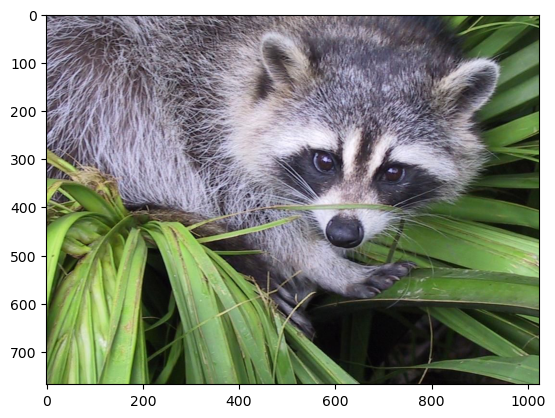

In [5]:
import scipy.datasets

# Read a sample image from scipy
img = scipy.datasets.face()

# Plot it
plt.imshow(img);

What is `img`? Lets find out:

In [6]:
img.shape, img.dtype, img.min(), img.max()

((768, 1024, 3), dtype('uint8'), np.uint8(0), np.uint8(255))

Here, `img` is a `N x M x 3` array, with `N` the number of rows and `M` the number of columns. `3` is for Red, Green, Blue (RGB) channels. Here the values are mapped to the`[0, 255]` range, indicating the intensity of each color:

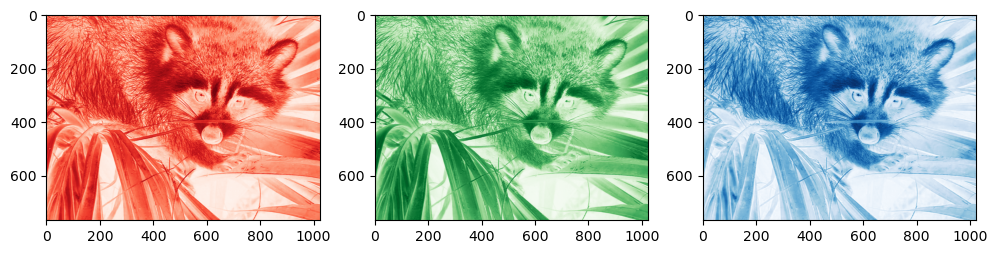

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.imshow(img[..., 0], cmap='Reds');
ax2.imshow(img[..., 1], cmap='Greens');
ax3.imshow(img[..., 2], cmap='Blues');

Matplotlib's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow) understands what is meant when given 3D data with the last dimension of size 3. When given a 2D array of any type, it will map the data to a colorscale value:

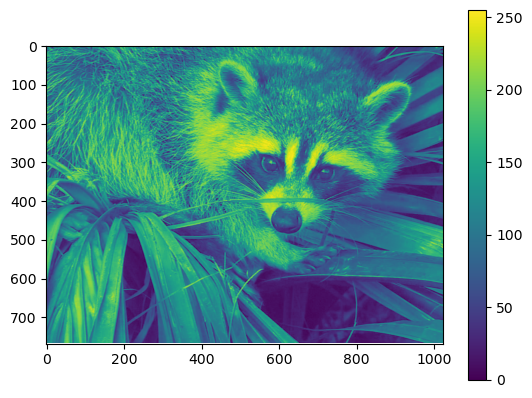

In [8]:
data = img[..., 0]  # Select the red channel
im = plt.imshow(data);
plt.colorbar(im, orientation='vertical');

Some of the things explained above might be a bit overwhelming right now. Don't worry! We will get back to these concepts later in this unit.

### nD arrays as structured data

Nearly all other use cases for nD arrays fall in this category. Multidimensional arrays allow to store data in the shape which is most meaningful for its analysis, display, and storage. For example:
- a map of temperature of shape (Y, X) where Y are the latitudes and X the longitudes
- a series of temperature maps of shape (Z, Y, X) where Z are the vertical pressure levels, Y are the latitudes and X the longitudes 
- a series of series of temperature maps of shape (T, Z, Y, X) where T are the time steps, Z are the vertical pressure levels, Y are the latitudes and X the longitudes

That's the most common use case in meteorology, and the one you will have to deal with in this week's homework. But in the course of your studies you will find many more interesting use cases, for example involving model parameters, physical quantities, time / space considerations, and more!

## Working with nD arrays 

*Copyright notice: parts of these examples are taken from the [numpy tutorial for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html).*

Multidimensional arrays are not different from 1 dimensional arrays. In fact, it is rather the 1 dimensional array which is a special case of the multidimensional one. All methods which work on 1D arrays also apply to nD arrays.

Let's create a 2D array:

In [9]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

![](https://numpy.org/doc/stable/_images/np_create_matrix.png)

### Selecting parts of an array with slicing

**Slicing** operations also work on nD arrays:

In [10]:
data[0, 1]

np.int64(2)

In [11]:
data[1:3]

array([[3, 4],
       [5, 6]])

In [12]:
data[0:2, 0]

array([1, 3])

![](https://numpy.org/doc/stable/_images/np_matrix_indexing.png)

Let's spend a bit more time on the second indexing example (`data[1:3]`), which I personally find most confusing because it contains an assumption. First, lets note that the two other indexing operations have a comma between the coordinates, explicitly indicating what to do on each dimension of the array.

`data[0:2, 0]` can be read as "take rows 0 to 2 (excluded) and column 0".

`data[1:3]` in turn can be read as  "take rows 1 to 3 (excluded) and all columns". The "all columns" is implicit (hidden) in the command above, which is why I sometimes prefer the more explicit:

In [13]:
data[1:3, :]  # colon means "all elements"

array([[3, 4],
       [5, 6]])

Which does the same but explicitly states "take all columns".

**Q: what do you think will be the output of data[:, :]?**

**Q: based on the example above and maybe a web search, formulate for yourself what is mean by "slicing" in numpy.**

(pos-ind)=
### Selecting parts of an array with positional indexing

**Slicing** is one way to **index** parts of a numpy array. It is useful when the area you want to select is structured, e.g. to select only one point or a range of an array as in the example above. Sometimes however you may want to select parts of an array based on other considerations, such as the location of multiple points or based on a condition. Let's get back to our previous example: 

In [14]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

Let's start with **positional indexing** (or [integer array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing)). Integer array indexing allows selection of arbitrary items in the array based on their N-dimensional index. Each integer array represents a number of indices into that dimension:

In [15]:
data[[0, 2], [1, 1]]

array([2, 6])

In your head, you might want to read this as: "we are extracting elements at locations (0, 1) and (2, 1)". A bit like putting these two together in an array (but faster): 

In [16]:
np.array([data[0, 1], data[2, 1]])

array([2, 6])

This means that if the length of the two integer arrays do not match, numpy will raise an error: 

In [17]:
data[[0, 2], [1, 1, 0]]  # won't work

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

Note that it is totally possible so select the same location several times, and also to use negative indexes like for slicing:

In [18]:
data[[0, 0, 2, -1], [1, 1, 1, 0]]

array([2, 2, 6, 5])

(bool-ind)=
### Selecting parts of an array with boolean indexing

[Boolean indexing](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing) allows to select parts on an array according to a condition of your choice. For example:

In [19]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
data[data > 2]

array([3, 4, 5, 6])

This is called **boolean indexing** because what actually matters is the type of `data > 2`.

### `np.nonzero` and indexing 

[np.nonzero](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html) is another way to do indexing based on a condition, but with a slightly different workflow and use cases:

In [21]:
indices = np.nonzero(data > 2)
indices

(array([1, 1, 2, 2]), array([0, 1, 0, 1]))

`np.nonzero` returns a tuple of arrays, one for each dimension of `data`, containing the indices of the non-zero elements in that dimension. These can then be used for statistics, or as positional indexers:

In [22]:
data[indices[0], indices[1]]

array([3, 4, 5, 6])

Which is the equivalent of `data[data > 2]`! If you have the choice between the two, boolean indexing (`data[data > 2]`) is faster and better than using `np.nonzero`, but sometimes `np.nonzero` is useful as well (see homework).

### Replacing data in ndarrays

To replace elements in a `ndarray`, indexing has to be applied on the left-hand side of the assignment operator. For example:

In [23]:
a = np.array([1, 2, 3])
a[1] = 99
a

array([ 1, 99,  3])

If indexing on the left-hand side is more complex (slicing, positional or boolean indexing), the values on the right have to be either scalars, or match the shape of the selection. Here are some examples:

In [24]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data[1:3] = 99
data

array([[ 1,  2],
       [99, 99],
       [99, 99]])

In [25]:
data[1:3] = [[96, 97], [98, 99]]
data

array([[ 1,  2],
       [96, 97],
       [98, 99]])

In [26]:
data[[0, 0], [0, 1]] = 100
data

array([[100, 100],
       [ 96,  97],
       [ 98,  99]])

According to the examples above, and like python lists, `ndarrays` are *mutable* objects. This is very important to remember *always*. For example, the following example should be more or less clear:

In [27]:
a = np.array([1, 2, 3])
b = a
b[1] = 99
a

array([ 1, 99,  3])

**Q: is it clear why `a` was changed as well? If not, ask in class!**

Now, with numpy indexing, an additional layer of complexity arises. Some indexing operations (categorized as "basic indexing") also return what is called a **view** of an array. See for example:

In [28]:
a = np.array([1, 2, 3])
b = a[1:]
b[0] = 99
a

array([ 1, 99,  3])

Slicing is basic indexing, and it always returns a view. Positional or boolean indexing is "advanced" indexing a returns a copy:

In [29]:
a = np.array([1, 2, 3])
b = a[[1, 2]]
b[0] = 99
a

array([1, 2, 3])

You will have to learn the details of "basic" and  "advanced" indexing in more details in the master lecture. For now, remember this pitfall. If you want to make sure to manipulate copies of arrays, you can always make a copy:

In [30]:
a = np.array([1, 2, 3])
b = a[1:].copy()  # make a copy of the sliced array
b[0] = 99
a  # nothing changed in a

array([1, 2, 3])

### Array statistics (aggregation) 

You can aggregate nD arrays the same way you aggregated 1D arrays:

In [31]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [32]:
data.max()

np.int64(6)

In [33]:
data.min()

np.int64(1)

In [34]:
data.sum()

np.int64(21)

![](https://numpy.org/doc/stable/_images/np_matrix_aggregation.png)

You can aggregate all the values in a matrix and you can aggregate them across columns or rows using the `axis` parameter. To illustrate this point, let’s look at a slightly modified dataset:

In [35]:
data = np.array([[1, 2], [5, 3], [4, 6]])
data

array([[1, 2],
       [5, 3],
       [4, 6]])

In [36]:
data.max(axis=0)

array([5, 6])

In [37]:
data.max(axis=1)

array([2, 5, 6])

![](https://numpy.org/doc/stable/_images/np_matrix_aggregation_row.png)

### `np.meshgrid`

[np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) is a very useful numpy function for grids and gridded data which are so common in physics and geosciences. It allows to create coordinate matrices from coordinate vectors:

In [38]:
x = np.array([1, 2, 3, 4])
y = np.array([-1, 0, 1])
xx, yy = np.meshgrid(x, y)

In [39]:
xx

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [40]:
yy

array([[-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 1,  1,  1,  1]])

This is useful to generate 2D fields, but also for plotting, selection by coordinates, and more.

### How to save and load NumPy objects

You will learn about several data formats used commonly in the geosciences next week, and especially next semester in the climate lecture. In the meantime, have a look at [this short section](https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-save-and-load-numpy-objects) in the numpy tutorial. You will need to read `.npy` files for your homework. 

## numpy - continued 

I highly recommend to learn the details of numpy at your own pace. The documentation is truly excellent:
- The [numpy tutorials for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html) to revisit many of the concepts (and learn a few new ones)
- The [numpy fundamentals](https://numpy.org/doc/stable/user/basics.html) are excellent as well. At this stage, I recommend the tutorials "array creation" to "broadcasting" 

## Plotting 2D arrays 

3D arrays (or more) cannot be plotted on a static flat image easily. 2D data, however, is plotted all the time. Here are a few recipes for you to start with. Plotting with matplotlib offers a very wide range of options and possibilities, sometimes confusing. I can't teach you all of it now: you will learn the details during the course of your studies and practice!

I recommend to quickly scroll through the following documentation pages, which will give you an overview of matplotlib's capabilities:
- https://matplotlib.org/stable/plot_types/index.html
- https://matplotlib.org/stable/gallery/index.html
- https://matplotlib.org/stable/tutorials/index.html

### `imshow`

`plt.imshow` is the simplest way to display an RGB image or assign a color to a value in a 2D array:

In [41]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([-4, -2, 0, 2, 4])
xx, yy = np.meshgrid(x, y)
data = xx**2 + yy
data

array([[-3,  0,  5, 12, 21, 32],
       [-1,  2,  7, 14, 23, 34],
       [ 1,  4,  9, 16, 25, 36],
       [ 3,  6, 11, 18, 27, 38],
       [ 5,  8, 13, 20, 29, 40]])

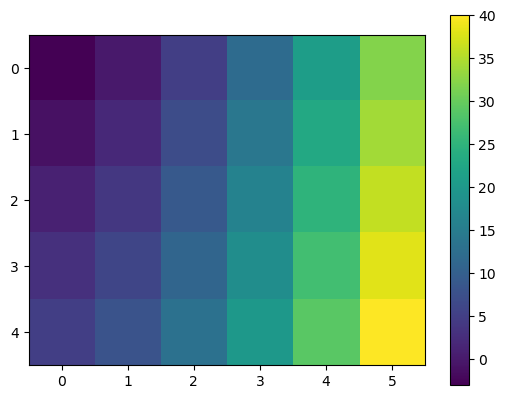

In [42]:
f, ax = plt.subplots()
im = ax.imshow(data);
f.colorbar(im);

Note the x and y coordinates of the plot. They to not correspond to the one we generated (how could they? `imshow` was not told about them). If you want the coordinates to show up properly, you will have to indicate them:

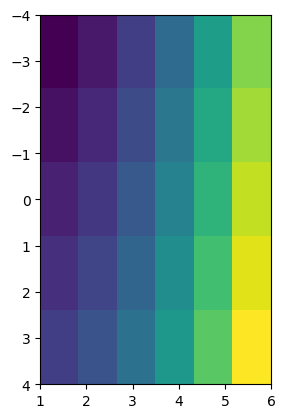

In [43]:
plt.imshow(data, extent=(x[0], x[-1], y[-1], y[0]));

Actually, this is still wrong! The correct way is to indicate the corner coordinates, which is a bit more work and implies to know the spatial resolution of the data:

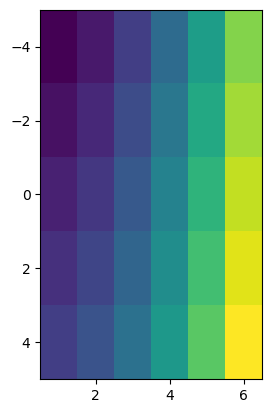

In [44]:
plt.imshow(data, extent=(x[0]-0.5, x[-1]+0.5, y[-1]+1, y[0]-1));

### `pcolormesh`

[pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html#matplotlib.axes.Axes.pcolormesh) is a slower, more flexible solution to the problem of displaying 2D data on screen. Unlike `imshow`, it allows coordinates as input, and these coordinates do not have to be regularly spaced:

In [45]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([-4, -3, -1, 2, 5])
xx, yy = np.meshgrid(x, y)
data = xx**2 + yy
data

array([[-3,  0,  5, 12, 21, 32],
       [-2,  1,  6, 13, 22, 33],
       [ 0,  3,  8, 15, 24, 35],
       [ 3,  6, 11, 18, 27, 38],
       [ 6,  9, 14, 21, 30, 41]])

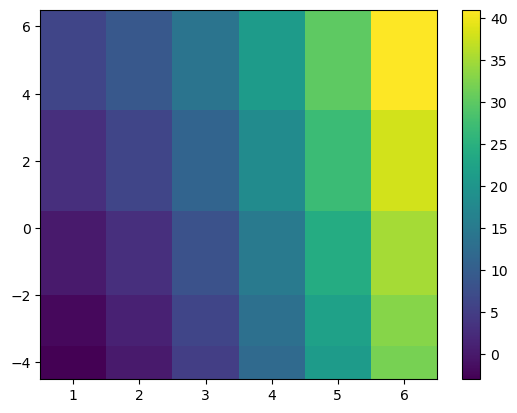

In [46]:
f, ax = plt.subplots()
im = ax.pcolormesh(x, y, data, shading='nearest');
f.colorbar(im);

Note that it also takes decisions on the direction of the y-axis based on the data. This is often a good idea, but can be changed of course:

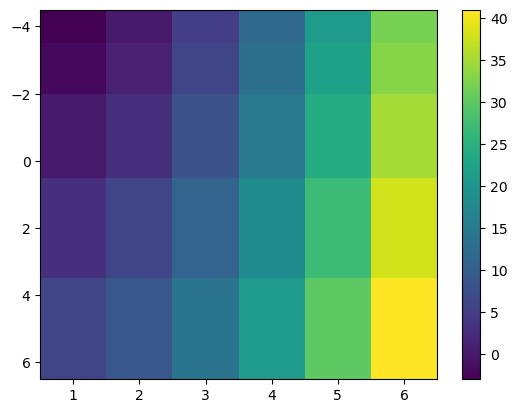

In [47]:
f, ax = plt.subplots()
im = ax.pcolormesh(x, y, data, shading='nearest');
ax.invert_yaxis();
f.colorbar(im);

Of course, you can change aspects of the plot such as [the colormap](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html) to use:

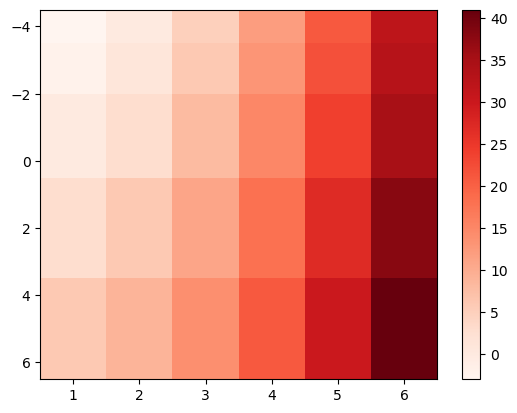

In [48]:
f, ax = plt.subplots()
im = ax.pcolormesh(x, y, data, shading='nearest', cmap='Reds');
ax.invert_yaxis();
f.colorbar(im);

### `contour` and `contourf` 

Contours are leaving the "pixel space" to make smooth contour fields around the data points.

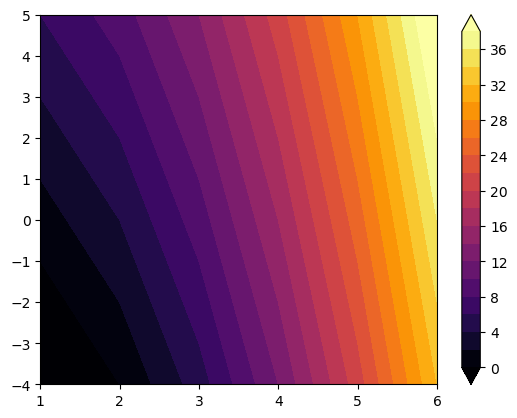

In [49]:
f, ax = plt.subplots()
cf = ax.contourf(x, y, data, levels=np.arange(0, 40, 2), cmap='inferno', extend='both');
f.colorbar(cf);

`contourf` fills with colors, while `contour` draws lines that can be annotated:

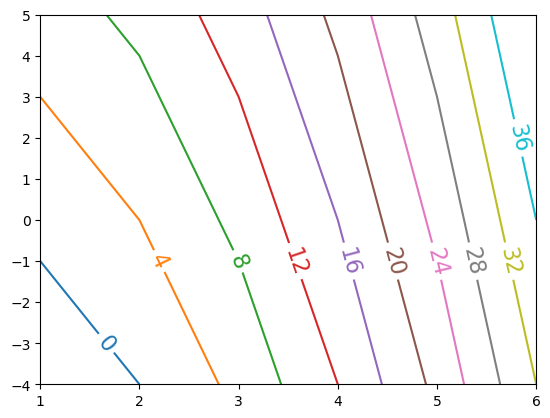

In [50]:
f, ax = plt.subplots()
c = ax.contour(x, y, data, levels=np.arange(0, 40, 4), cmap='tab10', extend='both');
ax.clabel(c, inline=True, fontsize=16);

## Learning checklist 

<label><input type="checkbox" id="week05_01" class="box"> I am able to subset multidimensional arrays according to location and according to a condition.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I understand the concepts of slicing, positional indexing, and boolean indexing.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I am aware of the pitfalls of assigning the same array to two different variable names. I am aware that a similar behavior occurs when slicing arrays.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I have a broad overview of the various ways to plot 2D arrays. I will however have to use my web-search and documentation reading sills to do my own plots later on.</input></label><br>